In [5]:
from sympy import symbols, sqrt, Eq, solveset, S
import numpy as np
import matplotlib.pyplot as plt

# Campos de direcciones

## Ejercicio 1:

* a) Considere la EDO 
$$(y^2+3y-4)\sqrt{y} dx - dy = 0$$
verifique que es una EDO autónoma.

* b) Clasifique todos sus puntos de equilibrio.
* c) Grafique el campo de direcciones asociado a la EDO autónoma.
* d) En base al retrato de fase, determine $\displaystyle\lim_{x\to \infty} y$ para $-4<y<0$.
* e) Repita el proceso de d) esta vez para  $0<y<1$.

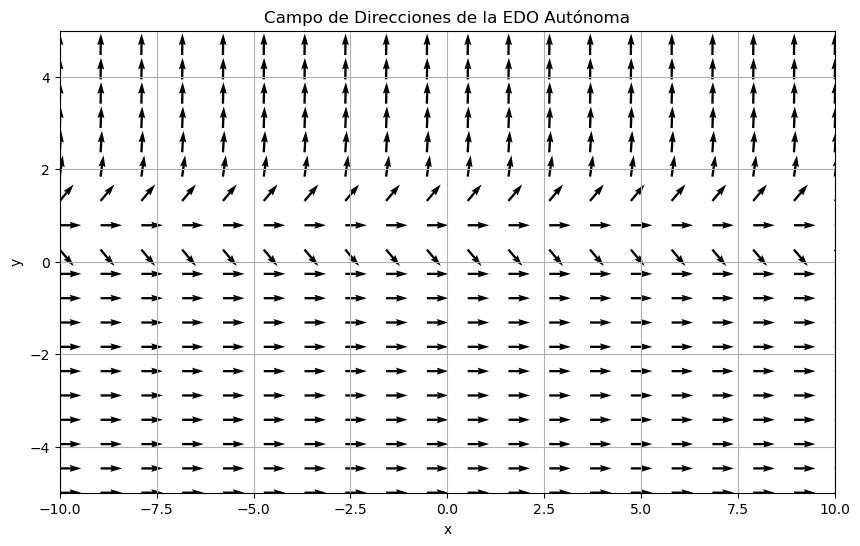

Puntos de equilibrio: [-4, 0, 1]


In [6]:
y = symbols('y', real=True)

ecuacion = Eq((y**2 + 3*y - 4) * sqrt(y), 0)

puntos_equilibrio = solveset(ecuacion, y, domain=S.Reals)
puntos_equilibrio_list = list(puntos_equilibrio)

# Campo de direcciones
def edo_autonoma(y):
    return (y**2 + 3*y - 4) * np.sqrt(y) if y >= 0 else 0

x_range = np.linspace(-10, 10, 20)
y_range = np.linspace(-5, 5, 20)

X, Y = np.meshgrid(x_range, y_range)

U = 1
V = np.vectorize(edo_autonoma)(Y)

N = np.sqrt(U**2 + V**2)
U, V = U/N, V/N

plt.figure(figsize=(10, 6))
plt.quiver(X, Y, U, V, angles='xy')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de Direcciones de la EDO Autónoma')
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.grid(True)
plt.show()

# Imprimir los puntos de equilibrio
print("Puntos de equilibrio:", puntos_equilibrio_list)

## Ejercicio 2:

La EDO autónoma

$$m \frac{dy}{dt} = mg − ky^2$$

modela la velocidad $y(t)$ de un cuerpo de masa $m$ (en kg) que está cayendo bajo la influencia de la gravedad. Debido a que el término $–ky^2$ representa la resistencia del aire, la velocidad de un cuerpo que cae de una gran altura no aumenta sin límite conforme pasa el tiempo $t$.

Suponga que el cuerpo tiene masa 2 $[kg]$ y $k = g$ donde $g = 9, 8 \left[ \frac{m}{s^2} \right]$.

* a) Construya un campo de direcciones para la EDO autónoma.
* b) Determine y clasifique los puntos de equilibrio en atractor, repulsor o nodo.
* c) Utilice la información anterior para encontrar la velocidad límite conforme $t \to \infty$.

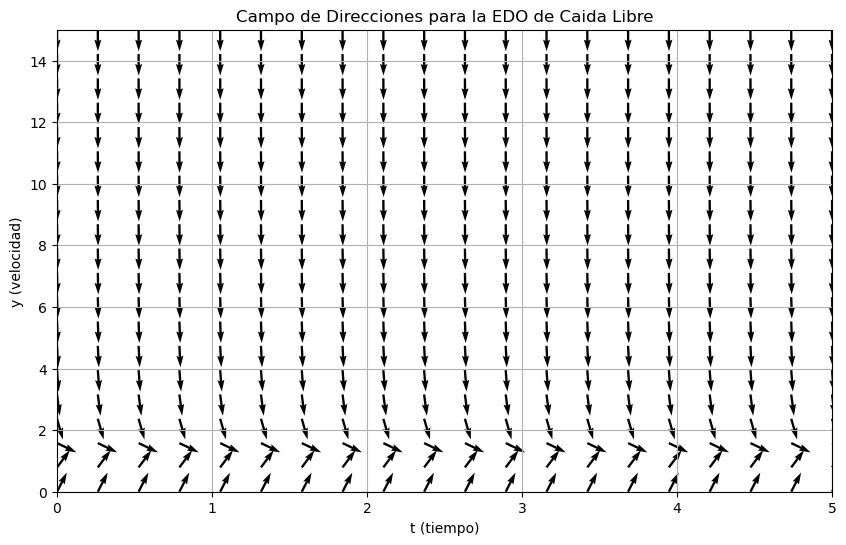

Puntos de equilibrio: [-1.41421356237310, 1.41421356237310]


In [7]:
m = 2  
g = 9.8
k = g 

y = symbols('y', real=True)

def edo_caida_libre(y):
    return g - k/m * y**2

rango_t = np.linspace(0, 5, 20)
rango_y = np.linspace(0, 15, 20)

T, Y = np.meshgrid(rango_t, rango_y)

U = 1
V = np.vectorize(edo_caida_libre)(Y)

N = np.sqrt(U**2 + V**2)
U, V = U/N, V/N

plt.figure(figsize=(10, 6))
plt.quiver(T, Y, U, V, angles='xy')
plt.xlabel('t (tiempo)')
plt.ylabel('y (velocidad)')
plt.title('Campo de Direcciones para la EDO de Caida Libre')
plt.xlim([0, 5])
plt.ylim([0, 15])
plt.grid(True)
plt.show()

puntos_equilibrio = solveset(Eq(m*g - k*y**2, 0), y, domain=S.Reals)
puntos_equilibrio_list = list(puntos_equilibrio)

print("Puntos de equilibrio:", puntos_equilibrio_list)

## Ejercicio 3:

Cuando se combinan ciertas clases de reacciones químicas, la razón con la que se forman los nuevos componentes se modela por la ecuación diferencial autónoma

$$\frac{dx}{dt} = k[x^2 − (\alpha  + \beta)x + \alpha \beta],$$

donde $k > 0$ es una constante de proporcionalidad, $0 < \alpha < \beta$, y $x(t)$ denota el número de gramos del nuevo componente al tiempo $t$. Considere el caso en que $k = \frac{3}{2},$  $\alpha = 2$ y $\beta = 5$.

* a) Construya un campo de direcciones para la EDO autónoma.
* b) Determine y clasifique los puntos de equilibrio en atractor, repulsor o nodo.
* c) Utilizando la información anterior, prediga el comportamiento de $x(t)$ para diferentes
condiciones iniciales $x(0) = x_0$ conforme $t \to \infty$. Relacione este resultado con el contexto
del problema.

## Ejercicio 4:

Considere la ecuación diferencial
$$ y'=2xy^2 $$

* a) Resuelva la EDO a través de variables separabales.
* b) Verifique que $y=0$ también es solución de la EDO y que no pertenece a la familia de soluciones encontrada en a) ¿Contradice esto el teorema de existencia y unicidad?
* c) Construya un campo de direcciones asociado a la EDO.
* d) Utilizando un ciclo `for`, grafique al menos 10 soluciones particulares sobre el campo de direcciones y compruebe que los resultados en a) son correctos.


## Ejercicio 5:

La siguiente ecuación diferencial 
$$y' = e^{y^2}(1-y^2)$$
es **separable** y **autónoma** y su solución general puede ser encontrada al integrando 
$$\int \frac{1}{e^{y^2}(1-y^2)}  dy = \int dx$$
pero la integral respecto a $y$ no se puede calcular mediante técnicas estándar. A pesar de lo anterior, es posible estudiar su comportamiento de manera cualitativa.

* a) Encuentre las soluciones de equilibrio de la EDO.
* b) Construya un campo de direcciones asociado a la EDO.
* c) Grafique las soluciones de equilibro en el campo de direcciones (Para graficar funciones constantes se sugiere utilizar, por ejemplo, $y=c x^0$ donde corresponda).
* d) Determine $\displaystyle\lim_{x \to \infty} y(x)$ si $y(x)$ es una solución particular para el PVI
$$y' = e^{y^2}(1-y^2) \quad ; \quad y(0)=y_0$$
para 
    * $y_0=0$
    * $y_0=1$
    * $y_0=-3$
    * $y_0=2$

## Ejercicio 6:

El circuito eléctrico más sencillo está dado por 

<img src="1.png">

el circuito contiene un capacitor, un resistor y una fuente de voltaje. El comportamiento del resistor es definido por una constante positiva $R$ (la resistencia) medida en Ohms $[\Omega]$, el del capacitor por una constante positiva $C$ (la capacitancia) medida en Faraday $[F]$. El voltaje de entrada a través de la fuente de voltage en un tiempo dado $t$ se denota por $V(t)$ medida en Volts $[V]$. Esta fuente de voltaje puede ser una fuente constante como la de una batería, o puede ser variable.

Las variables que determinan el comportamiento del circuito en un tiempo particular $t$ son la corriente $i(t)$ y el voltaje a través del capacitor $v_c(t)$. La teoría de circuitos eléctricos establece que el voltaje $v_c$ satisface la ecuación diferencial
$$RC \frac{d v_c}{dt} + v_c = V(t)$$

Suponga que un determinado circuito $R=2 [\Omega]$, $C=0.2 [F]$.

* a) Reescriba la EDO con los datos entregados en su forma $v_c ' = f(t, v_c)$ identificando las variables independiente y dependiente.

* b) Suponga que el voltaje de entrada es nulo $V(t)=0 [V]$, construya un campo de direcciones asociado y describa el comportamiento de las soluciones conforme $t \to \infty$.

* c) Suponga esta vez que el voltaje de entrada es constante $V(t)=20 [V]$. Determine soluciones de equilibrio.

* d) Repita el análisis hecho en b) con $V(t)=20$.

## Ejercicio 7:

La siguiente ecuación diferencial 
$$ y' = e^{-x^2} $$
es separable y su solución general está dada por 
$$ y = \int e^{-x^2} dx $$
pero la función $f(x)= e^{-x^2}$ no tiene primitiva, por ende no es posible determinar una solución explícita. A pesar de lo anterior, es posible ver el comportamiento gráfico de la solución.

* a) Construya un campo de direcciones asociado a la EDO.

* b) Determine (si es posible) el comportamiento de $y$ cuando $x \to \infty$, para la condición inicial $y(3)=0$.

* c) Justifique si la solución que pasa por $(3,0)$ es una función acotada.

    * Recuerde que: Una función $f:I \subset \mathbb{R} \to \mathbb{R}$ se dice acotada, si existe $M > 0$ tal que
$ |f(x)|< M , \quad \forall x \in I.  $

* d) A partir del campo de direcciones, justifique si existe alguna solución constante.
